(150, 4)


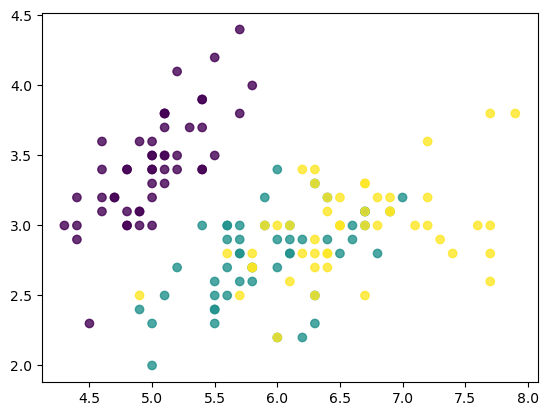

In [21]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()
X = iris.data
y = iris.target
print(X.shape)
plt.scatter(X[:,0], X[:,1],c=y, alpha=0.8)



Text(0.5, 1.0, 'Test set')

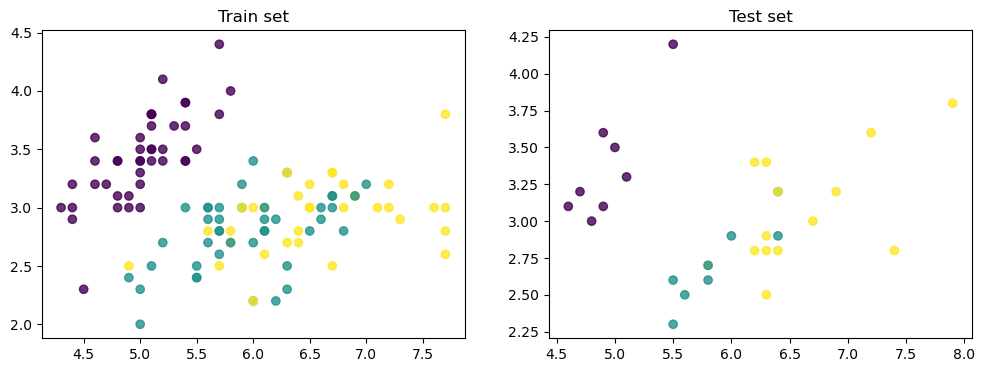

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.scatter(X_train[:,0], X_train[:,1],c=y_train, alpha=0.8)
plt.title('Train set')
plt.subplot(122)
plt.scatter(X_test[:,0], X_test[:,1],c=y_test, alpha=0.8)
plt.title('Test set')

In [23]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
print('Train score: ', model.score(X_train, y_train))
print('Test score: ', model.score(X_test, y_test))

Train score:  0.9666666666666667
Test score:  0.9666666666666667


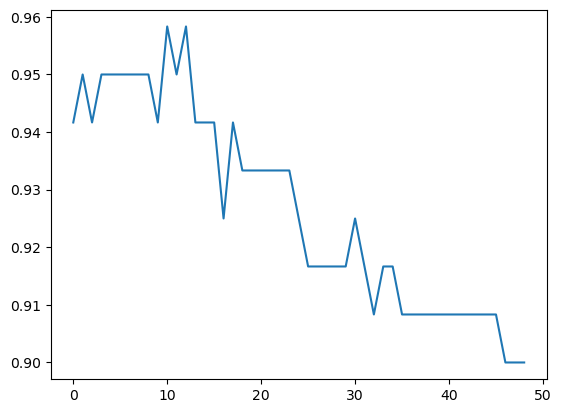

In [24]:
#Cross validation
from sklearn.model_selection import cross_val_score
val_score=[]
for i in range(1, 50):
    val = cross_val_score(KNeighborsClassifier(i), X_train, y_train, cv=5).mean()
    val_score.append(val)
plt.plot(val_score)

[ 9 19 28 38 48 57 67 76 86 96]


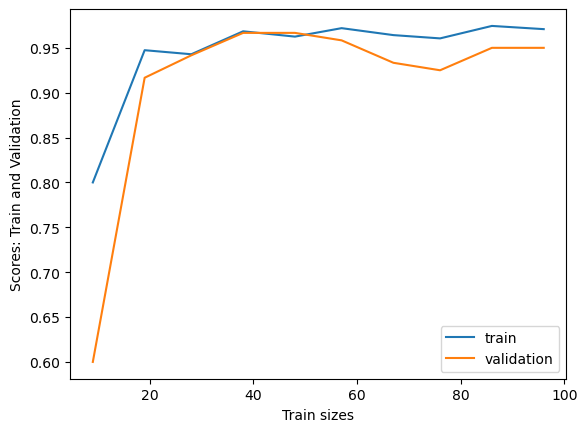

In [25]:
#Learning curves: Used to optimize the model based on the amount of data used to train the model
from sklearn.model_selection import learning_curve

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel("Train sizes")
plt.ylabel("Scores: Train and Validation")
plt.legend()